# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [5]:
def apply_svd_custom(X_train, X_test, n_components):
    # Center the data by subtracting the mean of X_train
    X_mean = np.mean(X_train, axis=0)
    X_train_centered = X_train - X_mean
    X_test_centered = X_test - X_mean  # Use the same mean for X_test

    # Compute covariance matrix
    covariance_matrix = X_train_centered.T @ X_train_centered

    # Compute eigenvalues and eigenvectors using np.linalg.eigh
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Select the top n_components eigenvectors (principal components)
    V = eigenvectors[:, :n_components]

    # Project the data onto the new feature space
    X_train_svd = X_train_centered @ V
    X_test_svd = X_test_centered @ V

    return X_train_svd, X_test_svd, V


## Part 3: Train Logistic Regression and Measure Performance

In [6]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [7]:
# Define the numbers of components to test
svd_components = [10, 20, 50, 100, 200, 300, 400, 500, 784]

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd, V = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    
    # Store the results
    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time,
        'V': V  # Store V for visualization
    })
        
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 10 components...
SVD components: 10, Accuracy: 0.8035, Training time: 0.7687 seconds
Applying custom SVD with 20 components...
SVD components: 20, Accuracy: 0.8784, Training time: 1.9609 seconds
Applying custom SVD with 50 components...
SVD components: 50, Accuracy: 0.9080, Training time: 8.9118 seconds
Applying custom SVD with 100 components...
SVD components: 100, Accuracy: 0.9181, Training time: 25.4824 seconds
Applying custom SVD with 200 components...
SVD components: 200, Accuracy: 0.9206, Training time: 61.2150 seconds
Applying custom SVD with 300 components...
SVD components: 300, Accuracy: 0.9206, Training time: 103.7260 seconds
Applying custom SVD with 400 components...
SVD components: 400, Accuracy: 0.9196, Training time: 177.1922 seconds
Applying custom SVD with 500 components...
SVD components: 500, Accuracy: 0.9205, Training time: 218.7447 seconds
Applying custom SVD with 784 components.

## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


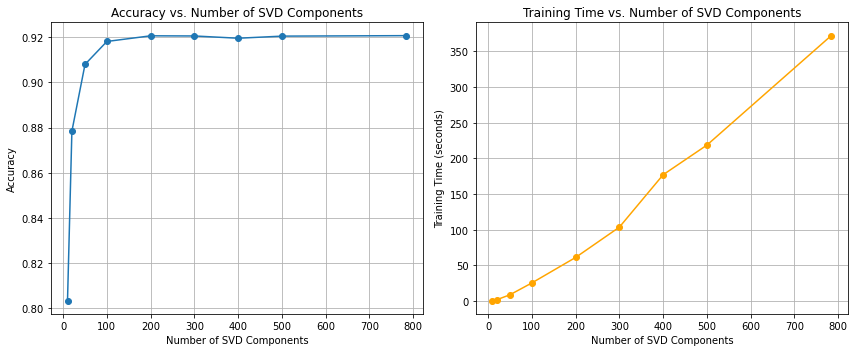

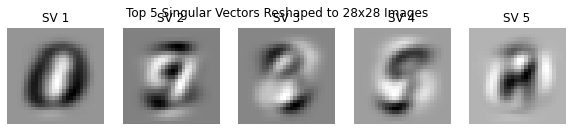

In [8]:
# Extract accuracies and training times for plotting
n_components_list = [result['n_components'] for result in results]
accuracies = [result['accuracy'] for result in results]
training_times = [result['training_time'] for result in results]

# Plot accuracy vs. number of components
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(n_components_list, accuracies, marker='o')
plt.title('Accuracy vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot training time vs. number of components
plt.subplot(1, 2, 2)
plt.plot(n_components_list, training_times, marker='o', color='orange')
plt.title('Training Time vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Visualize the top 5 singular vectors reshaped to 28x28 images
# Get the V matrix from the result with the maximum number of components
V_full = None
for result in results:
    if result['n_components'] == max(svd_components):
        V_full = result['V']
        break

if V_full is not None:
    top_5_singular_vectors = V_full[:, :5]

    plt.figure(figsize=(10, 2))
    for i in range(5):
        singular_vector = top_5_singular_vectors[:, i]
        singular_image = singular_vector.reshape(28, 28)
        # Normalize the image for better visualization
        singular_image_norm = (singular_image - singular_image.min()) / (singular_image.max() - singular_image.min())
        plt.subplot(1, 5, i+1)
        plt.imshow(singular_image_norm, cmap='gray')
        plt.title(f'SV {i+1}')
        plt.axis('off')

    plt.suptitle('Top 5 Singular Vectors Reshaped to 28x28 Images')
    plt.show()
else:
    print("V matrix not found for maximum number of components.")


## Part 6: Analyze / Conclusion 

YOUR ANSWER: From the experiments, we can see that the model's accuracy increases with the number of SVD components, showing significant improvement up to around 100 to 200 components, beyond which the gains plateau, which indicates diminishing returns. Simultaneously, training time rises with more components, highlighting a trade-off between computational efficiency and performance. Visualizing the top five singular vectors reshaped into 28x28 images reveals patterns resembling average digit shapes, which captures the most significant variances in the dataset. Therefore, selecting approximately 100 to 200 SVD components offers the best balance between accuracy and training time, which effectively reduces dimensionality and simplifies the model without substantially compromising performance. This shows that applying SVD preprocessing enhances both the efficiency and effectiveness of logistic regression on the MNIST dataset.
